In [0]:
!pip install scikit-tda

In [0]:
!pip install tadasets
!pip install rips
!pip install kmapper
!pip install cechmate

In [0]:
import sktda, tadasets, cechmate, persim, kmapper, ripser
import matplotlib.pyplot as plt
import random
from scipy import stats
import numpy as np

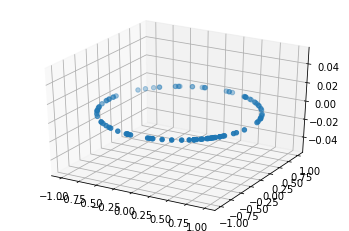

In [6]:
loop = tadasets.dsphere(d=1, n=100)
n,d = loop.shape
loop = np.concatenate([loop, np.zeros((n,1))], axis=1)
tadasets.plot3d(loop)

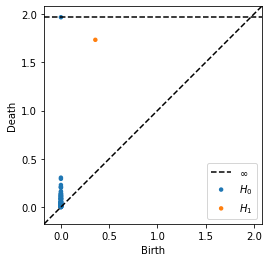

In [7]:
dgms = ripser.ripser(loop)['dgms']
persim.plot_diagrams(dgms)

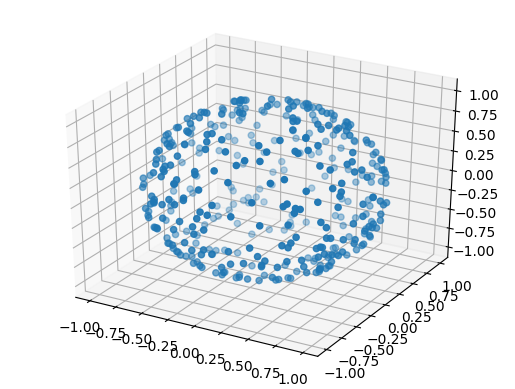

In [9]:
sphere= tadasets.dsphere(n=400, d=2)
tadasets.plot3d(sphere)

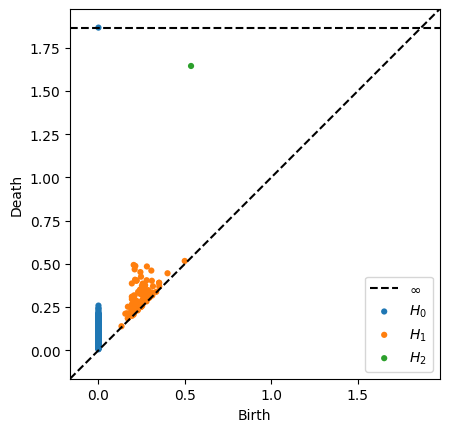

In [10]:
dgms = ripser.ripser(sphere, maxdim=2)['dgms']
persim.plot_diagrams(dgms)

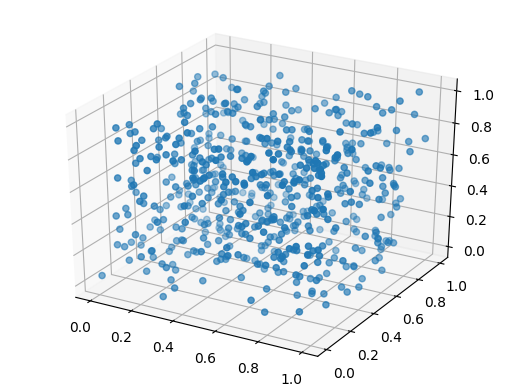

In [6]:
cube = np.random.rand(600,3)
tadasets.plot3d(cube)

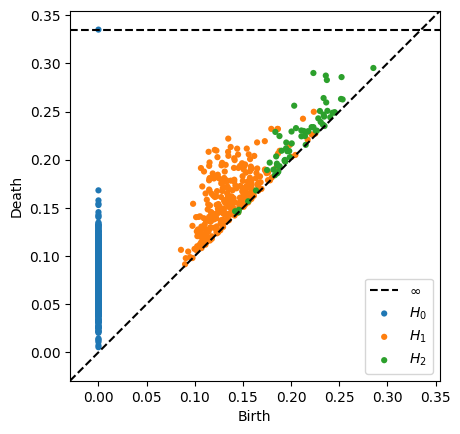

In [7]:
dgms = ripser.ripser(cube, maxdim=2)['dgms']
persim.plot_diagrams(dgms)

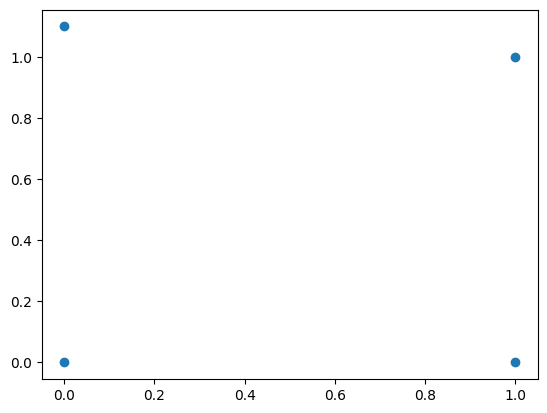

In [11]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
plt.scatter(points[:,0], points[:,1])

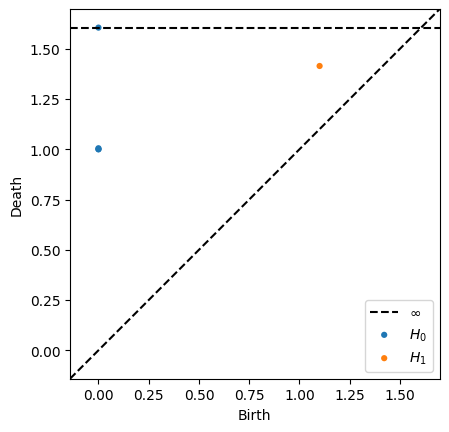

In [9]:
dgms = ripser.ripser(points)['dgms']
persim.plot_diagrams(dgms)

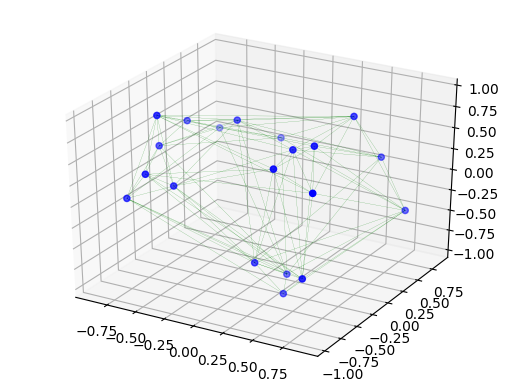

In [6]:
# from https://stackoverflow.com/questions/20025784/how-to-visualize-3d-delaunay-triangulation-in-python, answer by Iddo Hanniel 

from mpl_toolkits import mplot3d
from scipy.spatial import Delaunay

def plot_tri_2(ax, points, tri):
    edges = collect_edges(tri)
    x = np.array([])
    y = np.array([])
    z = np.array([])
    for (i,j) in edges:
        x = np.append(x, [points[i, 0], points[j, 0], np.nan])      
        y = np.append(y, [points[i, 1], points[j, 1], np.nan])      
        z = np.append(z, [points[i, 2], points[j, 2], np.nan])
    ax.plot3D(x, y, z, color='g', lw='0.1')

    ax.scatter(points[:,0], points[:,1], points[:,2], color='b')


def collect_edges(tri):
    edges = set()

    def sorted_tuple(a,b):
        return (a,b) if a < b else (b,a)
    # Add edges of tetrahedron (sorted so we don't add an edge twice, even if it comes in reverse order).
    for (i0, i1, i2, i3) in tri.simplices:
        edges.add(sorted_tuple(i0,i1))
        edges.add(sorted_tuple(i0,i2))
        edges.add(sorted_tuple(i0,i3))
        edges.add(sorted_tuple(i1,i2))
        edges.add(sorted_tuple(i1,i3))
        edges.add(sorted_tuple(i2,i3))
    return edges

x = 2.0 * np.random.rand(20) - 1.0
y = 2.0 * np.random.rand(20) - 1.0
z = 2.0 * np.random.rand(20) - 1.0
points = np.vstack([x, y, z]).T
tri = Delaunay(points)

fig = plt.figure()
ax = plt.axes(projection='3d')
plot_tri_2(ax, points, tri)    

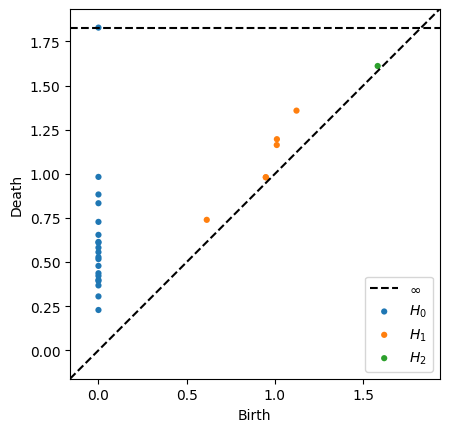

In [9]:
dgms = ripser.ripser(points, maxdim=2)['dgms']
persim.plot_diagrams(dgms)

In [0]:
torus=tadasets.torus(n=2000)
tadasets.plot3d(torus)

In [0]:
dgms = ripser.ripser(torus, maxdim=2)['dgms']
persim.plot_diagrams(dgms)

In [0]:
swiss_roll = tadasets.swiss_roll(n=2000)
tadasets.plot3d(swiss_roll)

In [0]:
dgms = ripser.ripser(swiss_roll, maxdim=2)['dgms']
persim.plot_diagrams(dgms)

https://github.com/scikit-tda/persim/blob/master/docs/notebooks/Persistence%20Images.ipynb

In [0]:
from itertools import product

import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Text(0.5, 1.0, 'Persistence diagram of $H_0$ and $H_1$')

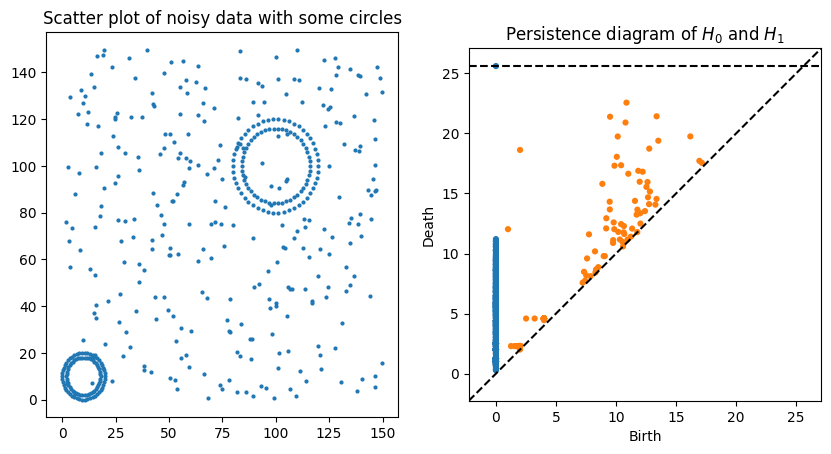

In [0]:
data = np.concatenate([150 * np.random.random((300,2)), 
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")


https://github.com/scikit-tda/persim/blob/master/docs/notebooks/Persistence%20barcode%20measure.ipynb

In [0]:
# Normal point clouds
mu = 0.5
sigma = 0.25
l1 = []
for i in range(10):
    d1 = np.random.normal(mu, sigma, (500,2))
    l1.append(d1)
# Uniform point clouds
l2 = []
for i in range(10):
    d2 = np.random.random((500,2))
    l2.append(d2)

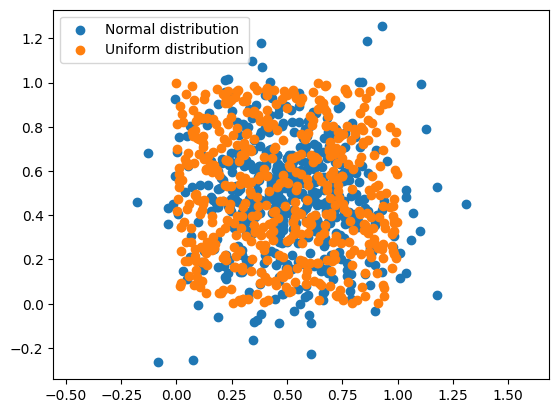

In [0]:
# Example of normal and uniform point clouds
plt.scatter(d1[:,0], d1[:,1], label="Normal distribution")
plt.scatter(d2[:,0], d2[:,1], label="Uniform distribution")
plt.axis('equal')
plt.legend()
plt.show()

In [0]:
from persim.persistent_entropy import *

# Generate the persistent diagrams using ripser
p = 0
dgm_d1 = []
dgm_d2 = []
for i in range(len(l1)):
    dgm_d1.append(ripser.ripser(l1[i])['dgms'][p])
    dgm_d2.append(ripser.ripser(l2[i])['dgms'][p])
# Calculate their persistent entropy.
e1 = persistent_entropy(dgm_d1)
e2 = persistent_entropy(dgm_d2)

In [0]:
stats.mannwhitneyu(e1, e2)

MannwhitneyuResult(statistic=0.0, pvalue=9.133589555477501e-05)